Analysis
--------------

Based on the calculations below, there are a few conclusions we can draw from this data. To begin with, the standard deviations tells us how much variation there is between the data points in our data set. Each drug regimen has a low standard deviation which tells us the data was collected accurately and precisely, and that in turn can tell us our dataset is reliable. Additionally, there are 248 individual subjects in this study. To obtain basic normal distribution, the sample size only needs to be around 30, so a sample size of 248 instills a high level of confidence in our data. Upon taking a closer look at the sample size, it becomes evident each mouse was tested many times. This is important because it increases the reliability of the dataset in showcasing a drugs ability to shrink tumors. If each mouse was tested only once, then the effects of the drug would not be well documented; by testing at multiple timepoints the study demonstrates how the drug effects the tumor size over small increments of time. The sample size also has a sex split near 50/50. This is beneficial as it takes into account the effects of each sexes equally. If a study has 75% male mice, then it may be possible for that study to miss important results that would only be prevalent in females. The dataset further proves it reliability when looking at boxplots for a select few drug regimens. For the select four drugs tested the data proved to only have one outlier, for the drug Infubinol. 
We can begin to draw the conclusion that Capomulin has a significant effect on tumor size over time based on the line chart showing mouse x401 tumor volume decrease over a sampling period. This chart has a strong correlation to show the tumor shrank in size over the sampling time period. In addition, when comparing average mouse weight with average tumor volume, it is apparent that larger mice have larger tumors. This may suggest that the tumor severity may have a relation to overall individual health. If an individual is already in poor health then perhaps SSC can be exacerbated by these conditions.

In [78]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 

In [2]:
# Read in CSV's
mouse_metadata_path = "C:\\Users\\tsswi\\OneDrive\\Desktop\\DU_Classwork\\Module_5_Matplotlib\\module_5_starter_code\\Starter_Code\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\tsswi\\OneDrive\\Desktop\\DU_Classwork\\Module_5_Matplotlib\\module_5_starter_code\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, encoding = 'utf-8')
study_results = pd.read_csv(study_results_path, encoding = 'utf-8')

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset. Merge on "Mouse ID"
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking how many mice there are 
len(mouse_data_complete["Mouse ID"].unique())

249

In [7]:
# Checking how many Timepoints there are 
len(mouse_data_complete["Timepoint"])

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"])
mouse_duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = mouse_data_complete.loc[mouse_duplicates, "Mouse ID"].unique()
duplicated_df

array(['g989'], dtype=object)

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != 'g989']
mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_clean['Mouse ID'].unique())

248

Summary Statistics 
----------------------------

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_types = mouse_data_clean["Drug Regimen"].unique()

# Use groupby method
means = mouse_data_clean.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
medians = mouse_data_clean.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
variances = mouse_data_clean.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
stds = mouse_data_clean.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
sems = mouse_data_clean.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

In [14]:
# Assemble the resulting series into a single summary DataFrame.
tumor_vol_summary = pd.DataFrame({"Mean Tumor Vol (mm3)": means,
                                 "Median Tumor Vol (mm3)": medians, "Variance of Tumor Vol (mm3)": variances,
                                 "Standard Dev of Tumor Vol  (mm3)": stds, "SEM of Tumor Vol (mm3)": sems})

tumor_vol_summary

,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance of Tumor Vol (mm3),Standard Dev of Tumor Vol (mm3),SEM of Tumor Vol (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts 
----------------------------

<AxesSubplot:title={'center':'Total Number of Timepoints per Mouse'}, xlabel='Mouse ID', ylabel='Total Number of Timepoints'>

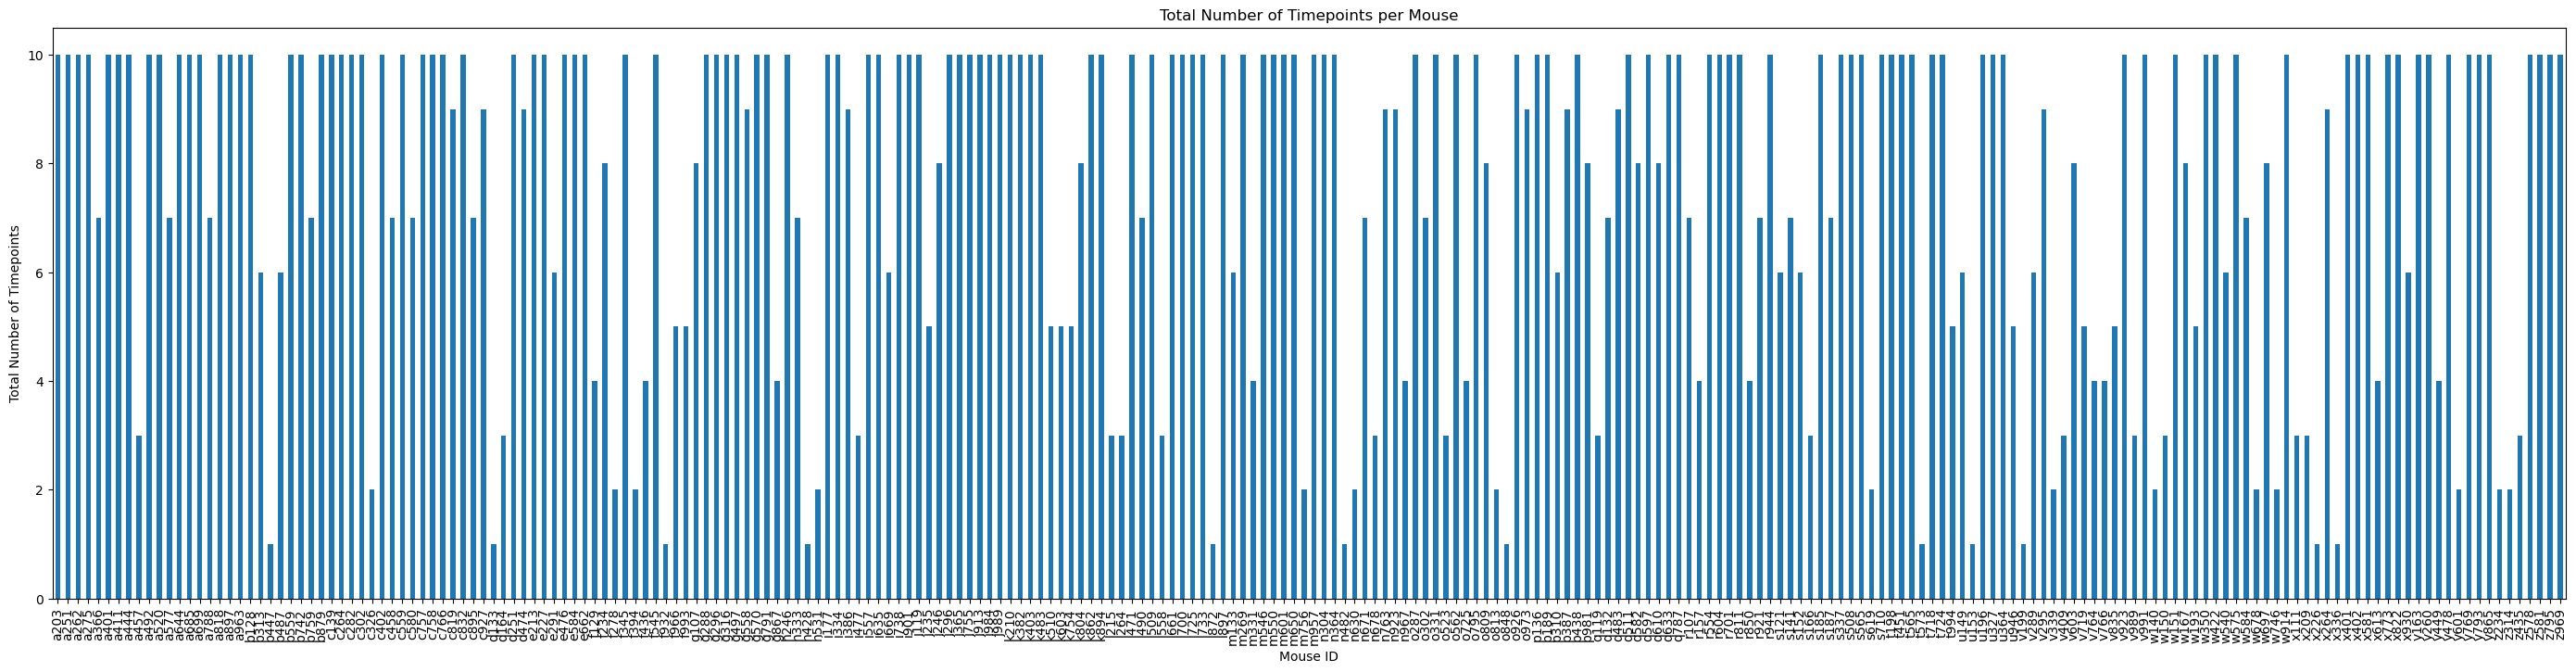

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_time = mouse_data_clean.groupby(["Mouse ID"])["Timepoint"].count()
timepoints_Pandas = total_time.plot.bar(figsize = (35,8), xlabel = "Mouse ID", ylabel = "Total Number of Timepoints",
                   title ='Total Number of Timepoints per Mouse' )
timepoints_Pandas

<BarContainer object of 248 artists>

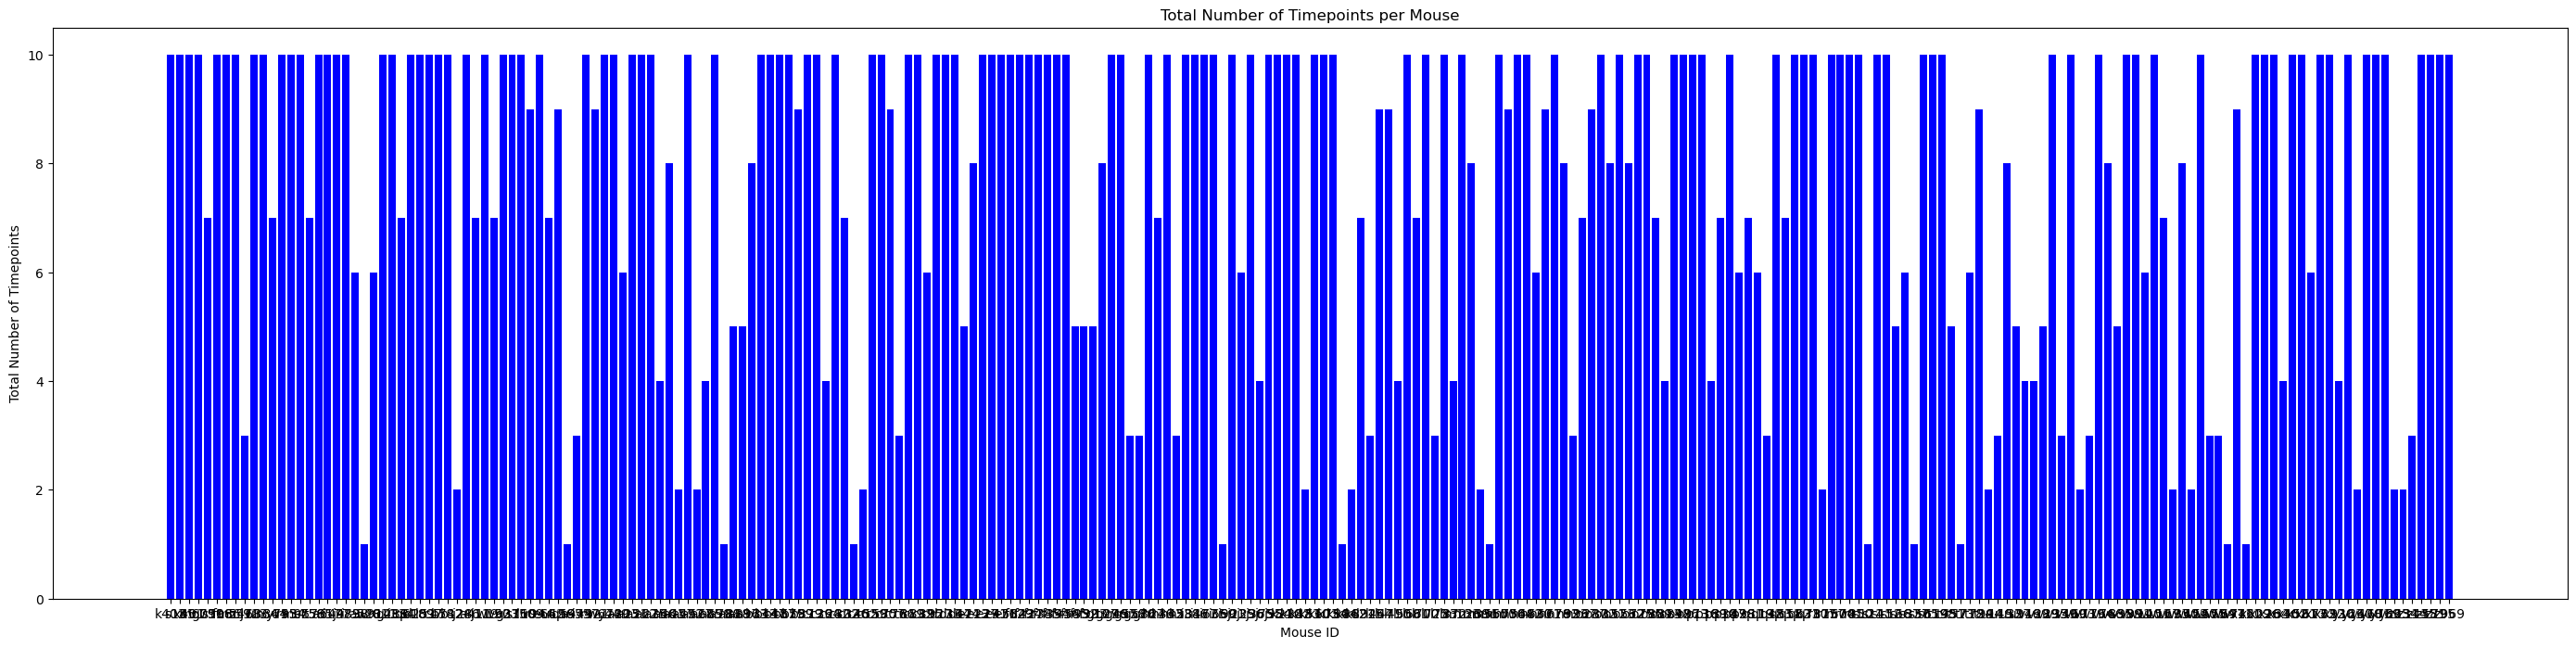

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(35,8))

id_mice = mouse_data_clean["Mouse ID"].unique()
counts_per_mouse = total_time
x_axis = np.arange(len(counts_per_mouse))

#set the tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, id_mice)

#Give our chart some labels and a title
plt.title("Total Number of Timepoints per Mouse")
plt.xlabel("Mouse ID")
plt.ylabel("Total Number of Timepoints")


plt.bar(x_axis, counts_per_mouse, color='blue', align='center')

<AxesSubplot:title={'center':'Female vs. Male Mice in Study'}, ylabel='Sex'>

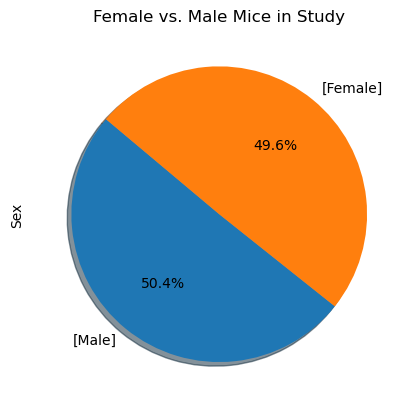

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_clean.groupby(["Mouse ID"])['Sex'].unique().value_counts().plot(kind='pie', autopct = '%1.1f%%',
                                                                          title = "Female vs. Male Mice in Study",
                                                                          shadow=True, startangle=140)
#female_mice = 123
#male_mice = 125


([<matplotlib.patches.Wedge at 0x1eab83ba7c0>,
 [Text(-0.7176837777416648, -0.8336246128602807, "['Female']"),
  Text(0.7176837777416649, 0.8336246128602806, "['Male']")],
 [Text(-0.39146387876818073, -0.45470433428742574, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

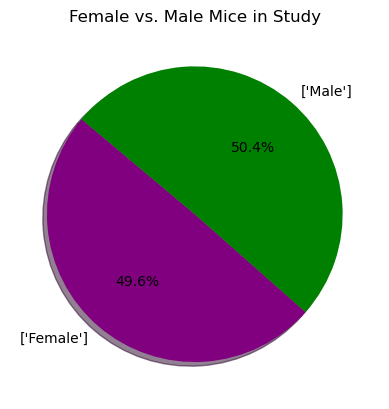

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = [["Female"], ['Male']]
sizes = [123, 125]
colors = ['purple', 'green']
explode = [0,0]

#Give our chart some labels and a title
plt.title("Female vs. Male Mice in Study")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)


Quartiles, Outliers and Boxplots
----------------------------------------------

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_clean.groupby(['Mouse ID'])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = last_timepoint.reset_index()
mouse_variable = last_timepoint

mouse_data_timepoint = pd.merge(mouse_variable, mouse_data_clean, how="left", on=["Mouse ID", "Timepoint"])
mouse_data_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [167]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_mice = mouse_data_timepoint[mouse_data_timepoint["Drug Regimen"] == 'Capomulin']
capo_mice_quant = capo_mice['Tumor Volume (mm3)'].quantile([.25, .75])
capo_IQR = capo_mice_quant[0.75] - capo_mice_quant[0.25]
capo_upper = (capo_mice_quant[0.75]) + 1.5 * capo_IQR
capo_lower = (capo_mice_quant[0.25]) - 1.5 * capo_IQR

capo_mice_filtered = capo_mice[(capo_mice['Tumor Volume (mm3)'] > capo_upper) | 
                               (capo_mice["Tumor Volume (mm3)"] < capo_lower)]

tumor_vol_data.append(capo_mice_filtered)
capo_mice_filtered # show us there are no outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [168]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
rami_mice = mouse_data_timepoint[mouse_data_timepoint["Drug Regimen"] == 'Ramicane']
rami_mice_quant = rami_mice['Tumor Volume (mm3)'].quantile([.25, .75])
rami_IQR = rami_mice_quant[0.75] - rami_mice_quant[0.25]
rami_upper = (rami_mice_quant[0.75]) + 1.5 * rami_IQR
rami_lower = (rami_mice_quant[0.25]) - 1.5 * rami_IQR

rami_mice_filtered = rami_mice[(rami_mice['Tumor Volume (mm3)'] > rami_upper) | 
                               (rami_mice["Tumor Volume (mm3)"] < rami_lower)]

tumor_vol_data.append(rami_mice_filtered)
rami_mice_filtered # show us there are no outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [169]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infu_mice = mouse_data_timepoint[mouse_data_timepoint["Drug Regimen"] == 'Infubinol']
infu_mice_quant = infu_mice['Tumor Volume (mm3)'].quantile([.25, .75])
infu_IQR = infu_mice_quant[0.75] - infu_mice_quant[0.25]
infu_upper = (infu_mice_quant[0.75]) + 1.5 * infu_IQR
infu_lower = (infu_mice_quant[0.25]) - 1.5 * infu_IQR

infu_mice_filtered = infu_mice[(infu_mice['Tumor Volume (mm3)'] > infu_upper) | 
                               (infu_mice["Tumor Volume (mm3)"] < infu_lower)]

tumor_vol_data.append(infu_mice_filtered)
infu_mice_filtered # show us there is ONE outlier

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


In [170]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceft_mice = mouse_data_timepoint[mouse_data_timepoint["Drug Regimen"] == 'Ceftamin']
ceft_mice_quant = ceft_mice['Tumor Volume (mm3)'].quantile([.25, .75])
ceft_IQR = ceft_mice_quant[0.75] - ceft_mice_quant[0.25]
ceft_upper = (ceft_mice_quant[0.75]) + 1.5 * ceft_IQR
ceft_lower = (ceft_mice_quant[0.25]) - 1.5 * ceft_IQR

ceft_mice_filtered = ceft_mice[(ceft_mice['Tumor Volume (mm3)'] > ceft_upper) | 
                               (ceft_mice["Tumor Volume (mm3)"] < ceft_lower)]

tumor_vol_data.append(ceft_mice_filtered)
ceft_mice_filtered # show us there are no outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


{'whiskers': [<matplotlib.lines.Line2D at 0x1eaba340d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1eaba351310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eaba340af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eaba351790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eaba351a60>],
 'means': []}

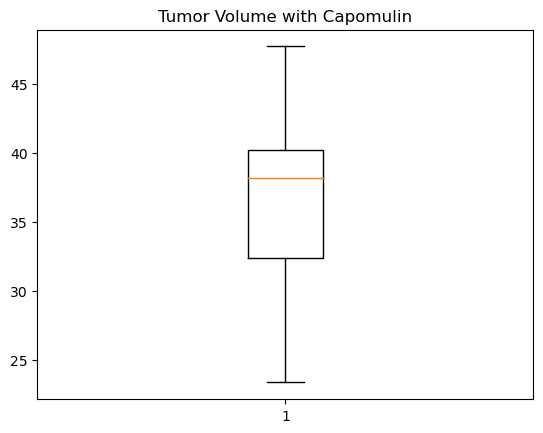

In [176]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. Capomulin
plt.title('Tumor Volume with Capomulin')
plt.boxplot(capo_mice['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eaba3656d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eaba365c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eaba365400>],
 'medians': [<matplotlib.lines.Line2D at 0x1eaba374250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eaba374520>],
 'means': []}

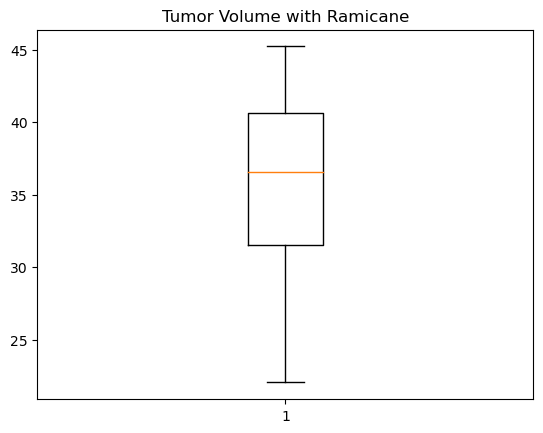

In [177]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. Ramicane
plt.title('Tumor Volume with Ramicane')
plt.boxplot(rami_mice['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eaba3c9100>,
 'caps': [<matplotlib.lines.Line2D at 0x1eaba3c96a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eaba3baf40>],
 'medians': [<matplotlib.lines.Line2D at 0x1eaba3c9c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eaba3c9f10>],
 'means': []}

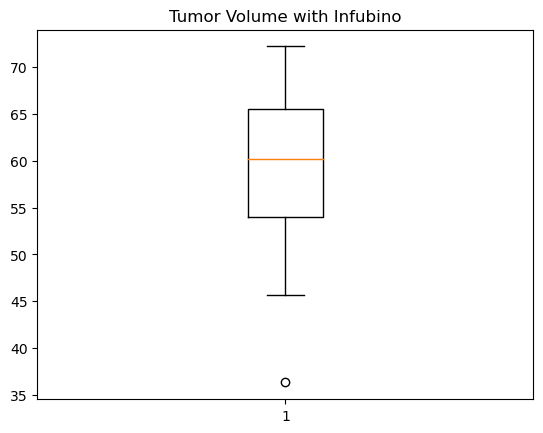

In [178]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. Infubinol
plt.title('Tumor Volume with Infubino')
plt.boxplot(infu_mice['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eaba42ba60>,
 'caps': [<matplotlib.lines.Line2D at 0x1eaba43a040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eaba42b760>],
 'medians': [<matplotlib.lines.Line2D at 0x1eaba43a5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eaba43a8b0>],
 'means': []}

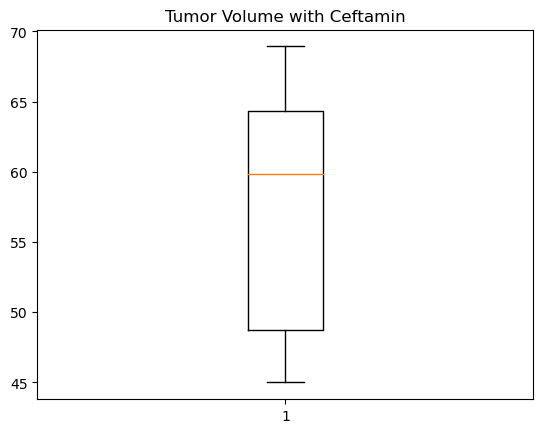

In [179]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. Ceftamin
plt.title('Tumor Volume with Ceftamin')
plt.boxplot(ceft_mice['Tumor Volume (mm3)'])

Line and Scatter Plots 
--------------------------------

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = mouse_data_clean[mouse_data_clean["Drug Regimen"] == 'Capomulin']
#look at the df to select a mouse
capomulin_mice.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [53]:
#After selecting mouse x401, filter capomulin_mice to just her
mouse_x401 = capomulin_mice[capomulin_mice['Mouse ID'] == 'x401']

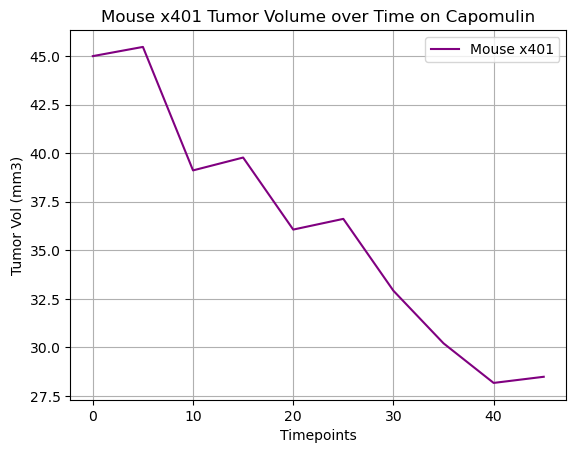

In [73]:
#store data in lists and create line chart for tumor vol vs timetpoint
tumor_vol = mouse_x401['Tumor Volume (mm3)'].unique()
x_axis = mouse_x401['Timepoint'].unique()

#Give titles and stylize 
plt.grid()
plt.xlabel("Timepoints")
plt.ylabel("Tumor Vol (mm3)")
plt.title("Mouse x401 Tumor Volume over Time on Capomulin")


plt.plot(x_axis, tumor_vol, color = 'purple', label = 'Mouse x401')
plt.legend()

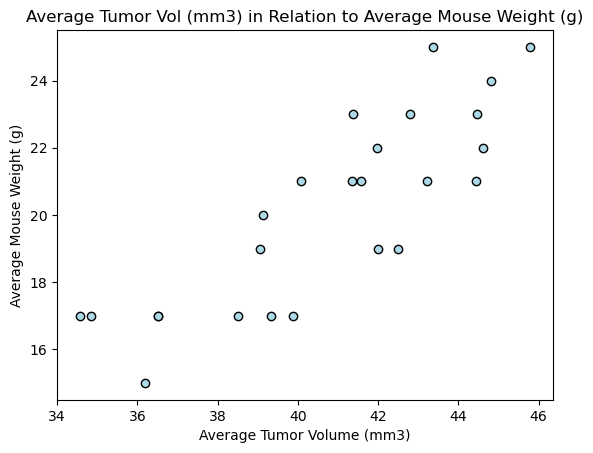

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ave_tumor = capomulin_mice.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
ave_weight = capomulin_mice.groupby(["Mouse ID"])["Weight (g)"].mean()

# Create a title, x label, and y label for our chart
plt.title("Average Tumor Vol (mm3) in Relation to Average Mouse Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Mouse Weight (g)")


plt.scatter(ave_tumor, ave_weight, marker = 'o', facecolors='lightblue', edgecolors='black')

Correlation and Regression 
----------------------------------------

In [76]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation_coeff = np.corrcoef(ave_tumor, ave_weight)
correlation_coeff

array([[1.        , 0.84193634],
       [0.84193634, 1.        ]])

In [80]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
linear_regression = scipy.stats.linregress(ave_tumor, ave_weight)
linear_regression

LinregressResult(slope=0.7426941826944182, intercept=-10.14886316411134, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.09924763572688554, intercept_stderr=4.057174696760879)